# Inaugural Project

**In this project, we solve and simulate a simple economic model, structure and document our code, and present the results in text and figures.**


Imports and set magics:

In [1]:
# importing packages
from IPython.display import display, Math
from types import SimpleNamespace
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Importing class from inaguralproject.py file
from inauguralproject import ExchangeEconomyClass

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Question 1

The set $\mathcal{C}$ requires finding pairs of goods $x_1^A$ and $x_2^A$ where the utility for both consumer A and B exceeds their initial endowment. Additionally, budget constraints prevent the consumers from consuming more than their initial endowment. Finally, 75 different allocations of each good should be tested for pairs of $x_1^A$ and $x_2^A$. Walras' law secures market clearance, thus we only need to find allocations of $x_1$ and $x_2$ for consumer A. The set $\mathcal{C}$ that fullfills these conditions is illustrated below. 


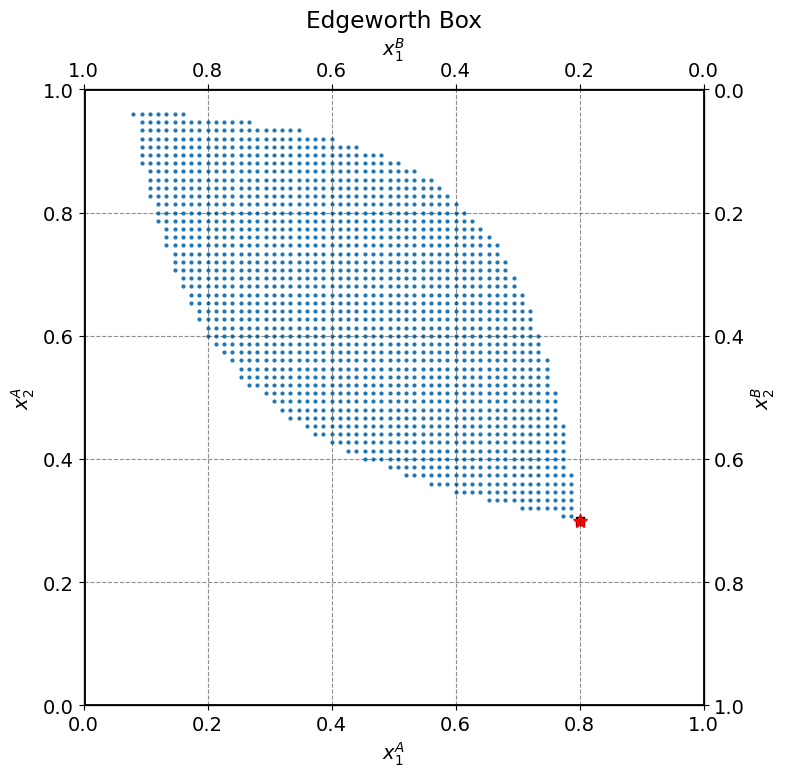

In [14]:
# Creating an instance of the class
economy = ExchangeEconomyClass()
par = economy.par

# Computing initial utilities
initial_utility_A = economy.utility_A(par.w1A, par.w2A)
initial_utility_B = economy.utility_B(par.w1B, par.w2B)

# Parameters in line with the assignment
N = 75
x1A_values = np.linspace(0, 1, N+1)
x2A_values = np.linspace(0, 1, N+1)

# Creating an array to store the Pareto efficient allocations
pareto_efficient_allocations = []

# For loop that terates over all possible combinations of x1A and x2A
for x1A in x1A_values:
    for x2A in x2A_values:
        # Ensure that x1B and x2B are non-negative
        x1B = 1 - x1A
        x2B = 1 - x2A
        if x1B >= 0 and x2B >= 0:
            # Computing utilites for both consumer A and consumer B
            utility_A = economy.utility_A(x1A, x2A)
            utility_B = economy.utility_B(x1B, x2B)

            # Check if both utilities are at least as high as the initial endowment utilities
            if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
                pareto_efficient_allocations.append((x1A, x2A))

# Creating a numpy array of the Pareto efficient allocations
pareto_efficient_allocations = np.array(pareto_efficient_allocations)

## Creating the edgeworth box ##
fig = plt.figure(frameon=False, figsize=(8, 8), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

# Plotting Pareto efficient allocations
ax_A.plot(pareto_efficient_allocations[:, 0], pareto_efficient_allocations[:, 1], 'o', markersize=2, label='Pareto Efficient Allocations')

# Plot initial endowments
ax_A.plot(par.w1A, par.w2A, 'r*', markersize=10, label='Initial Endowment A')

# SCATTER PLOT
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Limits for the plot
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')
ax_A.set_xlim([0, 1])
ax_A.set_ylim([0, 1])
  
# Design for the edgeworth box
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()
ax_B.set_xlim([1, 0])
ax_B.set_ylim([1, 0])

# Show the plot and giving the plot a random name 'John'
plt.title('Edgeworth Box')
plt.grid(True)
John = plt.show()

The red star in the figure represents the initial endowment of the consumers, while the blue dots indicate Pareto-improving allocations. The two consumers have different preferences towards the two goods, determined by $\alpha$ and $\beta$. Consumer A prefers good 2 over good 1, and consumer B prefers good 1 over good 2. Both consumers have Cobb-Douglas utility functions, thus demanding positive amounts of both goods. Therefore, we get the cigar-shape of the Pareto-improvement allocations. 

# Question 2

For  $p_1 \in \mathcal{P}_1$ the excess demand in the market clearing condition, s, is shown in the figure below.

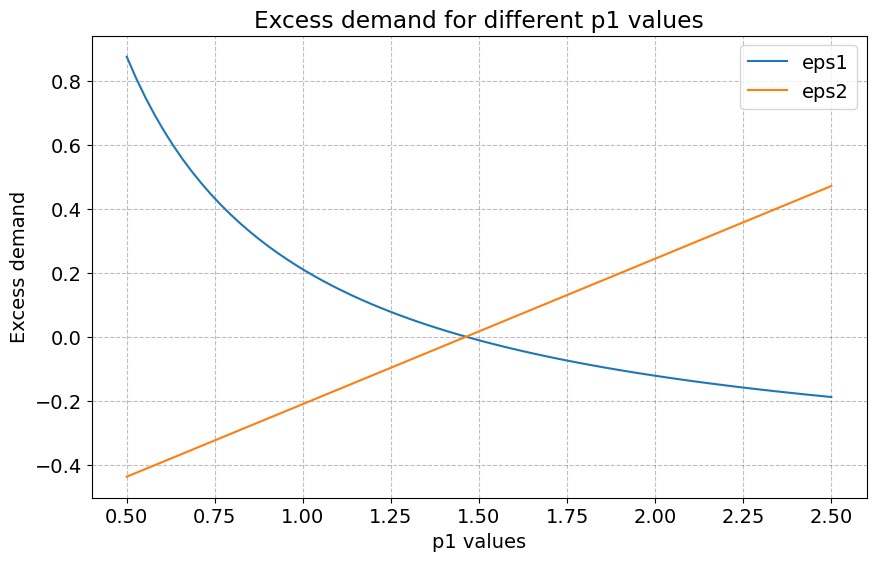

In [12]:
# Creating a numpy array of the p1 values given in the exercise
p1values = np.linspace(0.5, 2.5, N+1)

# Creating empty lists to store the excess demand values, epsilon1 and epsilon2
eps1_values = []
eps2_values = []

# For loop that iterates over all p1 values
for p1 in p1values:
    eps1, eps2 = economy.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

# Plotting the excess demand for different p1 values
plt.figure(figsize=(10, 6))
plt.plot(p1values, eps1_values, label='eps1')
plt.plot(p1values, eps2_values, label='eps2')
plt.xlabel('p1 values')
plt.ylabel('Excess demand')
plt.title('Excess demand for different p1 values')
plt.legend()
plt.show()

The figure illustrates that the excess demand equals zero at a $p_1$ value of approximately 0.9 (the exact market clearing price will be determined in the subsequent question). Furthermore, the orange line indicates that the excess demand for good 2 proportionally increases with the price of $p_1$. In contrast, the blue lines demonstrate that the excess demand for good 1 decreases as $p_1$ increases. 

For $\epsilon_2$: Changes in the price $p_1$ affect income but not the price of good 2. Therefore, any change in demand for good 2 is solely due to the income change caused by $p_1$.
For $\epsilon_1$: Changes in $p_1$ influence demand through both price and income effects. An increase in $p_1$ raises the price of good 1, reducing demand. However, this decrease is partially offset by the income increase resulting from selling the good.

# Question 3

In this question, we find the market clearing price with no excess demand, and further calculate the optimal allocations of consumers A and B for the two goods. 



In [13]:
# Defining a function enable to find the market clearing price 
def find_equilibrium(economy):
    # Define the excess demand function as a function of p1
    def excess_demand(p1):
        eps1, eps2 = economy.check_market_clearing(p1)
        return np.array([eps1, eps2])

    # Find the market clearing price p1_star
    result = minimize(lambda p1: np.sum(excess_demand(p1)**2), x0=1, method='Nelder-Mead', tol=1e-8)
    p1_star = result.x[0]
    return p1_star

print("The market clearing price is equal to: ", find_equilibrium(economy))

# Finding the optimal allocations for the market clearing price p1_star
Optimal_3_A = [economy.demand_A(find_equilibrium(economy))]
Optimal_3_B = [economy.demand_B(find_equilibrium(economy))]

# Convert the tuples in the lists to single lists
Optimal_3_A = [item for sublist in Optimal_3_A for item in sublist]
Optimal_3_B = [item for sublist in Optimal_3_B for item in sublist]

# Print the optimal allocations for both consumers
print("Optimal allocation for consumer A for goods 1 and 2: ", Optimal_3_A)
print("Optimal allocation for consumer B for goods 1 and 2: ", Optimal_3_B)

The market clearing price is equal to:  1.4631434798240672
Optimal allocation for consumer A for goods 1 and 2:  [0.12230664698802776, 0.35790434615935346]
Optimal allocation for consumer B for goods 1 and 2:  [0.8776933532254173, 0.6420956535283457]


The market clearing price of 0.94 ensures that the excess demand for both goods equals zero, indicating full utilization of the initial endowment. This market clearing price matches the figure in Question 2.

# Question 4

__4a)__ In this exercise, we find the optimal allocation if only prices in $\mathcal{P}_1$ can be chosen. 



In [19]:
# Creating empty lists to store the utility and allocations
utility_values = []
optimal_allocations = []

# Making a loop that iterates over all p1 values
for p1 in p1values:
    x1B, x2B = economy.demand_B(p1)
    # Check if the allocation are non-negative for for both consumers
    if x1B >= 0 and x2B >= 0 and (1 - x1B) >= 0 and (1 - x2B) >= 0:
        # Computing the utility for consumer A
        utility_A = economy.utility_A(1 - x1B, 1 - x2B)
        utility_values.append(utility_A)
        optimal_allocations.append((1 - x1B, 1 - x2B))
    else:
        # If the allocation is not feasible, we use the value -np.inf
        utility_values.append(-np.inf)
        optimal_allocations.append((None, None))

# Finding the maximum utility and the corresponding allocation
max_utility_index = np.argmax(utility_values)  # This will ignore -np.inf values
max_utility = utility_values[max_utility_index]
optimal_allocation_A = optimal_allocations[max_utility_index]
optimal_p1 = p1values[max_utility_index]

# Storing the optimal allocation for consumer A and B
Optimal_4a_A = optimal_allocation_A
Optimal_4a_B = [1 - optimal_allocation_A[0], 1 - optimal_allocation_A[1]]

# Printing
print("Optimal price p1:", optimal_p1)
print("Max utility for A:", max_utility)
print("Optimal allocation for A:", Optimal_4a_A)
print("Optimal allocation for B:", Optimal_4a_B)



Optimal price p1: 1.8866666666666667
Max utility for A: 0.633615985237553
Optimal allocation for A: (0.619316843345112, 0.6408888888888888)
Optimal allocation for B: [0.38068315665488806, 0.35911111111111116]


__4b)__ In this exercise, we find the optimal allocation when any positive price can be chosen.


In [20]:
# defining function to calculate utility from consumer A
def negative_utility_A(p1):
    x1B, x2B = economy.demand_B(p1)
    
    # Calculate the remaining allocation for consumer A after B has consumed
    x1A_remaining = 1 - x1B
    x2A_remaining = 1 - x2B
    
    # The utility function for A expects positive consumption, if negative we return a large number
    if x1A_remaining < 0 or x2A_remaining < 0:
        return 1e6  # A large number to indicate a bad utility (not feasible)
    
    # Get the utility for A with the remaining goods
    utility_A = economy.utility_A(x1A_remaining, x2A_remaining)
    
    # We return the negative utility because we want to maximize the utility, but the optimizer minimizes the function
    return -utility_A

# Finding the optimal price p1, that maximizes the utility for consumer A
res = minimize_scalar(negative_utility_A, bounds=(0.00000, 15), method='bounded')
optimal_p1 = res.x

# As of now the utility is negative, we thus multiply by -1 to get the positive utility
optimal_utility = -res.fun 

# Getting optimal allocation for consumer A and B
x1B, x2B = economy.demand_B(optimal_p1)
x1A_remaining = 1 - x1B
x2A_remaining = 1 - x2B

# Printing the results
print("Optimal price p1:", optimal_p1)
print("Max utility for A:", optimal_utility)
print("Optimal allocation for A:", (x1A_remaining, x2A_remaining))
print("Optimal allocation for B:", (x1B, x2B))


Optimal price p1: 1.8993465837364023
Max utility for A: 0.6336208506936581
Optimal allocation for A: (0.6209681350439451, 0.6400435610842399)
Optimal allocation for B: (0.3790318649560549, 0.3599564389157602)


In exercise 4a, the price $p_1$ is restricted by the set $\mathcal{P}_1$, which influences the optimal price and utility. The utility for A is slightly higher for any positive price in 4b, and the price is a bit higher. 

# Question 5

In Exercise 5, we assume that A chooses B’s consumption, ensuring that B is not worse off than in the initial endowment. A is thus the market maker.


__5a)__ In this exercise, we find the optimal allocation if the choice set is restricted to $\mathcal{C}$.

In [21]:
# defining function that calculates the optimal allocation when the choice set is restricted
def results(economy):
    # Utility at endowment
    endowment_utility_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
    endowment_utility_B = economy.utility_B(economy.par.w1B, economy.par.w2B)

    # Endowments
    endow_A = (economy.par.w1A, economy.par.w2A)
    endow_B = (economy.par.w1B, economy.par.w2B)

    # Optimal allocation
    optimal_allocation_A, max_util_A = economy.optimize_allocation()

    # Final allocation and utility for consumer B
    final_allocation_B = (1-optimal_allocation_A[0], 1-optimal_allocation_A[1])
    final_utility_B = economy.utility_B(final_allocation_B[0], final_allocation_B[1])
    
    # Printing the results
    print(f"Utility for A at A's endowment: {endowment_utility_A}")
    print(f"Utility for B at B's endowment: {endowment_utility_B}")
    print(f"Endowment for A: {endow_A}")
    print(f"Endowment for B: {endow_B}")
    print(f"Optimal allocation for A: {optimal_allocation_A}")
    print(f"Max utility for A at optimal allocation: {max_util_A}")
    print(f"Final allocation for B: {final_allocation_B}")
    print(f"Utility for B at final allocation: {final_utility_B}")
    return optimal_allocation_A, max_util_A

# calling the function results to print the results
results(economy)

# Storing optimla allocations for later use
Optimal_5A_A = [optimal_allocation_A[0], optimal_allocation_A[1]]
Optimal_5A_B = [1 - optimal_allocation_A[0], 1 - optimal_allocation_A[1]]

Utility for A at A's endowment: 0.41601676461038084
Utility for B at B's endowment: 0.30365889718756617
Endowment for A: (0.8, 0.3)
Endowment for B: (0.19999999999999996, 0.7)
Optimal allocation for A: (0.56, 0.8533333333333334)
Max utility for A at optimal allocation: 0.7415523509091093
Final allocation for B: (0.43999999999999995, 0.1466666666666666)
Utility for B at final allocation: 0.30507896071427915


In this exercise, consumer A chooses B's consumption, ensuring that B is not worse off than his initial endowment. We find that A is better off than in exercise 4 (a+b), which is as expected. Consumer A gets much higher utiliy at this allocation than his initial endowment, while consumer B gets almost the same utility compared to his initial endowment. 

5b) In this exercise, we find the optimal allocation if no further restrictions are imposed. 

In [22]:
# First, we define the endowment utility for consumer B
endowment_utility_B = economy.utility_B(economy.par.w1B, economy.par.w2B)

# Defining objective and constraint function for the optimization
def objective(x):
    return -economy.utility_A(x[0], x[1])

def constraint(x):
    return economy.utility_B(1-x[0], 1-x[1]) - endowment_utility_B

# Constraint for the optimization
con = {'type': 'ineq', 'fun': constraint}

# Bounds cannot be negative or above 1
bnds = ((0, 1), (0, 1))

# Initial guess starting from consumer A's endowment
x0 = [economy.par.w1A, economy.par.w2A]

# Run the optimization again with the correct definition of endowment_utility_B in scope
solution = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=con)

# If the optimizer found a solution, we will use it. Otherwise, set it to nothing. 
if solution.success:
    optimal_continuous_allocation_A = solution.x
    max_continuous_util_A = -solution.fun  # Negate because we minimized the negative utility
else:
    optimal_continuous_allocation_A = None
    max_continuous_util_A = None

optimal_continuous_allocation_A, max_continuous_util_A

# defining function specifcally for this exercise to print the results
def results5b(economy, optimal_allocation, max_utility):
    # Calculate initial utilities and endowments
    endowment_utility_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
    endowment_utility_B = economy.utility_B(economy.par.w1B, economy.par.w2B)
    endow_A = (economy.par.w1A, economy.par.w2A)
    endow_B = (economy.par.w1B, economy.par.w2B)

    # Final utility and allocation for B based on A's optimal allocation
    final_allocation_B = (1 - optimal_allocation[0], 1 - optimal_allocation[1])
    final_utility_B = economy.utility_B(final_allocation_B[0], final_allocation_B[1])

    # Print results
    print(f"Initial utility for A: {endowment_utility_A}")
    print(f"Initial utility for B: {endowment_utility_B}")
    print(f"Initial endowment for A: {endow_A}")
    print(f"Initial endowment for B: {endow_B}")
    print(f"Optimal continuous allocation for A: {optimal_allocation}")
    print(f"Maximum continuous utility for A: {max_utility}")
    print(f"Final allocation for B: {final_allocation_B}")
    print(f"Final utility for B: {final_utility_B}")

# Call the results5b function to print the results
results5b(economy, optimal_continuous_allocation_A, max_continuous_util_A)

Optimal_5B_A = [optimal_continuous_allocation_A[0], optimal_continuous_allocation_A[1]]
Optimal_5B_B = [1 - optimal_continuous_allocation_A[0], 1 - optimal_continuous_allocation_A[1]]


Initial utility for A: 0.41601676461038084
Initial utility for B: 0.30365889718756617
Initial endowment for A: (0.8, 0.3)
Initial endowment for B: (0.19999999999999996, 0.7)
Optimal continuous allocation for A: [0.57574506 0.84443779]
Maximum continuous utility for A: 0.7432276287140577
Final allocation for B: (0.42425494281286924, 0.15556221190083253)
Final utility for B: 0.3036588738576721


In this exercise, no restrictions are set on the choice set. We see that B's utility at this allocation is even lower and closer to his utility at the endowment, and A is even better off. 

# Question 6


__6a)__ Allocation with social planner

In [23]:
# Creating an objective function for the utilitarian social planner
def objective_function(x):
    x1A, x2A, x1B, x2B = x
    return -(economy.utility_A(x1A, x2A) + economy.utility_B(x1B, x2B))

# Constraints
def constraint1(x):
    return x[0] + x[2] - economy.par.w1A - economy.par.w1B

def constraint2(x):
    return x[1] + x[3] - economy.par.w2A - economy.par.w2B

# Initial guesses for allocations
x0 = [0.5, 0.5, 0.5, 0.5]  

# Bounds for consumption allocations. This ensures non-negative consumption
bounds = [(0, None)] * 4  # Bounds for each variable

# Defining constraint 1 and 2
cons = [{'type': 'eq', 'fun': constraint1}, {'type': 'eq', 'fun': constraint2}]

# Minmizing the objective function with the constraints
result = minimize(objective_function, x0, bounds=bounds, constraints=cons)

# Getting the optimal allocation from the above minimization problem
optimal_allocation = result.x

# Printing the results
print("Optimal allocation:")
print("x1A:", optimal_allocation[0])
print("x2A:", optimal_allocation[1])
print("x1B:", optimal_allocation[2])
print("x2B:", optimal_allocation[3])

Optimal allocation:
x1A: 0.3333333432674408
x2A: 0.6666666641831397
x1B: 0.6666666567325592
x2B: 0.3333333358168603


When a utilitarian social planner aims to maximize aggregate utility, we find that the optimal allocation directly mirrors each consumers' preferences for the two goods, $\alpha$ and $\beta$. The results are further described in exercise 6b. 

__6b)__ Illustration and comparison with previous questions

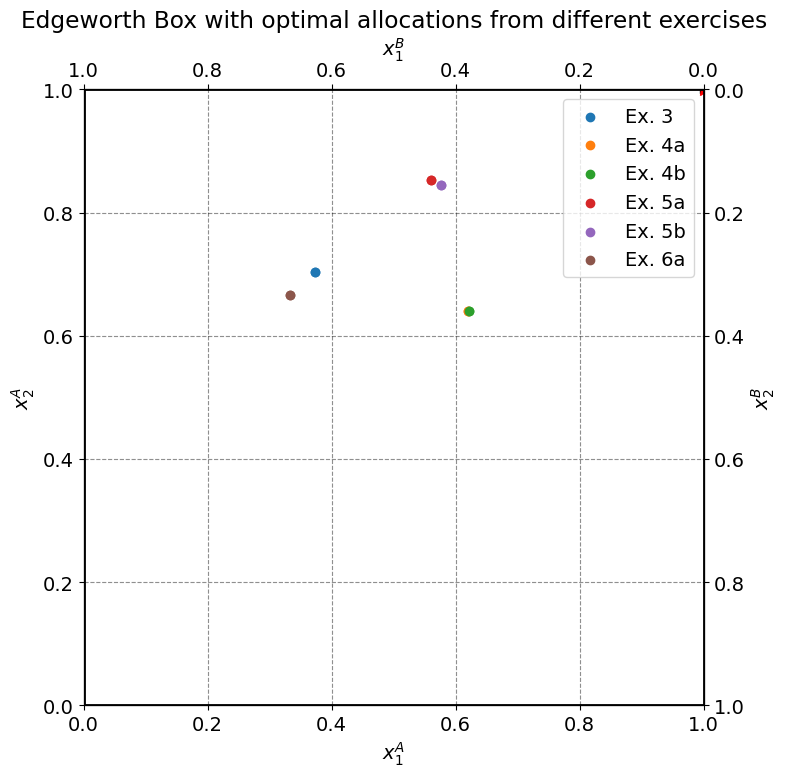

  Allocation  Utility A  Utility B  Sum of Utilities
0      Ex. 3   0.569274   0.488610          1.057883
1     Ex. 4a   0.633616   0.373352          1.006968
2     Ex. 4b   0.633621   0.372564          1.006184
3     Ex. 5a   0.741552   0.305079          1.046631
4     Ex. 5b   0.743228   0.303659          1.046887
5     Ex. 6a   0.529134   0.529134          1.058267


In [25]:
# Define the optimal allocations. We have had problems saving all the optimal allocations and plotting them. Thus we ended up just writing the allocations manually, which is definitely not efficient.
allocations_A = [(0.3725490199048352, 0.7037037022908529), (0.619316843345112, 0.6408888888888888), (0.6209681350439451, 0.6400435610842399), (0.56, 0.8533333333333334), (0.57574506, 0.84443779), (0.3333333432674408, 0.6666666641831397)]
allocations_B = [(0.6274509817781195, 0.29629629611968994), (0.380683156654888, 0.3591111111111112), (0.3790318649560549, 0.3599564389157602), (0.44, 0.14666666666666656), (0.42425494281286924, 0.15556221190083253), (0.6666666567325592, 0.3333333358168603)]

# Defining the labels for the different exercises
labels = ['Ex. 3', 'Ex. 4a', 'Ex. 4b', 'Ex. 5a', 'Ex. 5b', 'Ex. 6a']

# Plot the Edgeworth box with the Pareto efficient allocations
fig = plt.figure(frameon=False, figsize=(8, 8), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Setting labels for the plot
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

# Plot Pareto efficient allocations
for allocation_A, label in zip(allocations_A, labels):
    ax_A.scatter(*allocation_A, label=label)

# Plot initial endowments
ax_A.plot(1, 1, 'r*', markersize=10, label='Initial Endowment A')
ax_A.scatter(1, 1, marker='s', color='black', label='endowment')

# limits
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')
ax_A.set_xlim([0, 1])
ax_A.set_ylim([0, 1])

# Design for B
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()
ax_B.set_xlim([1, 0])
ax_B.set_ylim([1, 0])

# Pareto allocations for consumer B
for allocations_B, label in zip(allocations_B, labels):
    ax_B.scatter(*allocations_B, label=label)

# Show the plot with optimal allocaitons from different exercises in an Edgeworth box
plt.title('Edgeworth Box with optimal allocations from different exercises')
plt.legend()
plt.grid(True)
plt.show()


### Creating a DataFrame with the utilities for the different allocations from every exercise ###
allocations_A = [(0.3725490199048352, 0.7037037022908529), (0.619316843345112, 0.6408888888888888), (0.6209681350439451, 0.6400435610842399), (0.56, 0.8533333333333334), (0.57574506, 0.84443779), (0.3333333432674408, 0.6666666641831397)]
allocations_B = [(0.6274509817781195, 0.29629629611968994), (0.380683156654888, 0.3591111111111112), (0.3790318649560549, 0.3599564389157602), (0.44, 0.14666666666666656), (0.42425494281286924, 0.15556221190083253), (0.6666666567325592, 0.3333333358168603)]

# Define the utility functions
def utility_A(x1A, x2A, alpha=1/3):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B, beta=2/3):
    return x1B**beta * x2B**(1-beta)

# Calculate the utilities for each allocation
utilities_A = [utility_A(x1A, x2A) for x1A, x2A in allocations_A]
utilities_B = [utility_B(x1B, x2B) for x1B, x2B in allocations_B]

# Calculate the sum of utilities for A and B
utilities_sum = [uA + uB for uA, uB in zip(utilities_A, utilities_B)]

# Create a DataFrame
df = pd.DataFrame({
    'Allocation': labels,
    'Utility A': utilities_A,
    'Utility B': utilities_B,
    'Sum of Utilities': utilities_sum
})

print(df)

In the Edgeworth box above, all the optimal allocations from exercise 3)-6) are plotted. Note that the allocations for Ex. 4a and 4b are very close to eachother, which makes it difficult to see the difference. Furthermore, a table of the allocations and the respective utilities are shown. Here we see that the total utility is highest when the utilitarian social planner chooses the allocation, which is in line with theory (maximized aggregate utility). We see in Exercise 4 and 5 that utility is higher for consumer A than B, due to the fact that A chooses the price $p_1$ to maximize his own utility, given some restrictions for consumer B. The allocations without restrictions makes consumer A even better off. 

# Question 7 + 8

In Exercises 7 and 8, we draw a set W with 50 elements, find the market equilibrium allocation for each ωA ∈ C, and plot them in the Edgeworth box.

Set, $\mathcal{W}$, drawn with 50 elements

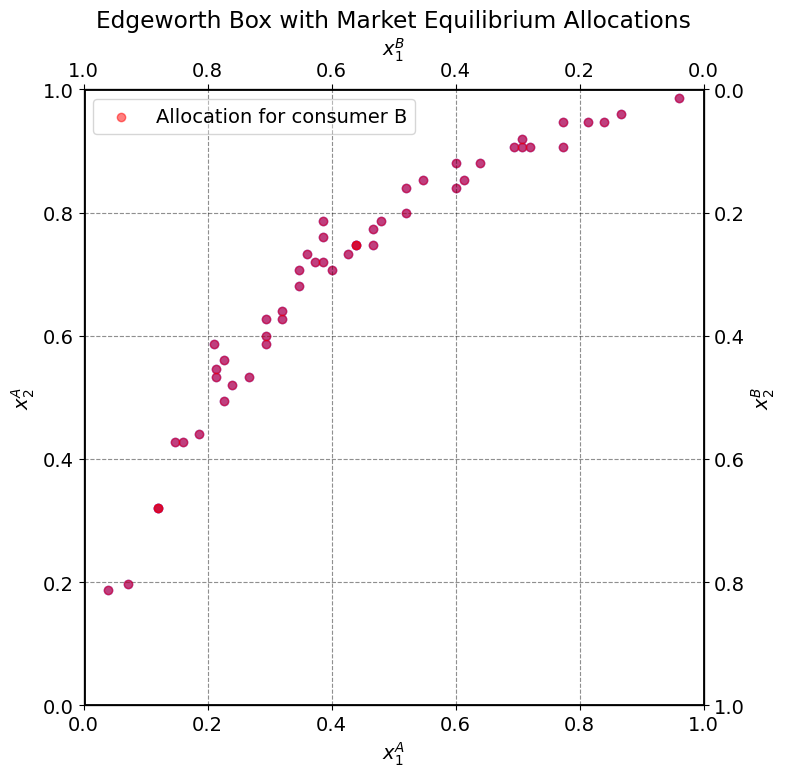

In [11]:
# Generate a random set W with 50 elements as described in the assignment
np.random.seed(0)
num_elements = 50

# This is the random set W, which is the endowments that is uniformly distributed between 0 and 1
w1A_values = np.random.uniform(0, 1, num_elements)
w2A_values = np.random.uniform(0, 1, num_elements)

# Create a figure for the Edgeworth box
fig = plt.figure(frameon=False, figsize=(8, 8), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

# limits
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')
ax_A.set_xlim([0, 1])
ax_A.set_ylim([0, 1])

# Design for B
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()
ax_B.set_xlim([1, 0])
ax_B.set_ylim([1, 0])

# Finding the market equilibrium allocations for the random set W
for w1A, w2A in zip(w1A_values, w2A_values):
    # Update the economy's endowments based on the random set W
    economy.par.w1A, economy.par.w2A = w1A, w2A
    economy.par.w1B, economy.par.w2B = 1 - w1A, 1 - w2A
    
    # Finding the optimal allocations
    optimal_allocation_A, max_util_A = economy.optimize_allocation()
    x1A, x2A = optimal_allocation_A
    # Remainder of the allocations goes to consumer B
    x1B, x2B = 1 - x1A, 1 - x2A  

    # Plotting A and B's allocations
    ax_A.scatter(x1A, x2A, color='blue', label='Allocation A' if w1A == w1A_values[0] else "", alpha=0.5)
    ax_B.scatter(x1B, x2B, color='red', label='Allocation for consumer B' if w1A == w1A_values[0] else "", alpha=0.5)

# Simplify the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax_A.legend(by_label.values(), by_label.keys())

plt.title('Edgeworth Box with Market Equilibrium Allocations')
plt.grid(True)
plt.show()

In the above figure, we have plotted the market equilibrium allocation for each $\omega^A \in \mathcal{C}$ in the Edgeworth box. We find that the market solutions at the different random endowments mirror the contract curve. This is due to the fact that the Edgeworth box represents all possible Pareto-efficient allocations given the initial endowments of agents A and B. As we vary $\omega^A$, the points representing equilibrium allocations move along the contract curve, illustrating how different distributions of initial endowments affect the final allocations achievable through trade. This visual representation helps us understand the efficiency of market outcomes under varying initial conditions.